# Assignment 3 - Classification
### CS450 Fall 2022

This assignment contains three problems. 
We will not use a grading script for this assignment, but the grading criteria is explained in the instructions.
If you are having issues with inconsistent results, try setting seeds. If you find a seed that works for you, keep it in your code so we can see the results you expect us to see when we look at your code.

There are demo notebooks in Google Drive that can help you get started.

I did not include any starter code. 

## Don't forget to save a copy of the notebook

Student Name: Sahatsawat Wimolchaijit
<br>If you used pair programming..
<br>Programming Partner: Maxine Mayer


# **Problem 1 - Decision Trees (20 points)**
* Pull the data from https://archive.ics.uci.edu/ml/datasets/Credit+Approval
* Create a decision tree to determine if credit should be extended based on a test case.
* Grading criteria: 
    * Demonstrate that you evaluated the data set and applied aduquate preprocessing to the data
    * Make sure you comment you code and the cleaning process so we can follow your logic in grading
    * Provide a confusion matrix for your results. Text based is fine.
    * Provide a visualization with explanation that demonstrates logical evaluation of the model
* Actual accuracy can depend on how you split the training and test data and other random variations
    * If you get below 70% accuracy, there may be a problem with your model
* *Spoiler Alert*: If you don't start with some exploration to determine how to approach data cleaning, this will be more difficult than it should be.
    

In [124]:
import pandas as pd

# Get the data
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data",
                  names = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16'])
df.shape

df.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [125]:
df.dtypes

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16     object
dtype: object

In [126]:
#Preprocessing the data
#Get rid of questionmarks
df = df[(df != '?').all(axis=1)]
df

# Convert to numirical
df ['A1'] = df['A1'].astype('category')
df['A1'] = df['A1'].cat.codes 

df ['A4'] = df['A4'].astype('category')
df['A4'] = df['A4'].cat.codes 

df ['A5'] = df['A5'].astype('category')
df['A5'] = df['A5'].cat.codes 

df ['A6'] = df['A6'].astype('category')
df['A6'] = df['A6'].cat.codes 

df ['A7'] = df['A7'].astype('category')
df['A7'] = df['A7'].cat.codes 

df ['A9'] = df['A9'].astype('category')
df['A9'] = df['A9'].cat.codes 

df ['A10'] = df['A10'].astype('category')
df['A10'] = df['A10'].cat.codes 

df ['A11'] = df['A11'].astype('category')
df['A11'] = df['A11'].cat.codes 

df ['A12'] = df['A12'].astype('category')
df['A12'] = df['A12'].cat.codes 

df ['A13'] = df['A13'].astype('category')
df['A13'] = df['A13'].cat.codes 

df ['A16'] = df['A16'].astype('category')
df['A16'] = df['A16'].cat.codes 

df

<ipython-input-126-976cdcb91984>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df ['A1'] = df['A1'].astype('category')
<ipython-input-126-976cdcb91984>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['A1'] = df['A1'].cat.codes
<ipython-input-126-976cdcb91984>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,00202,0,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,00043,560,0
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,0,00280,824,0
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,00100,3,0
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,00120,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,2,2,4,3,1.25,0,0,0,0,0,00260,0,1
686,0,22.67,0.750,1,0,1,7,2.00,0,1,2,1,0,00200,394,1
687,0,25.25,13.500,2,2,5,2,2.00,0,1,1,1,0,00200,1,1
688,1,17.92,0.205,1,0,0,7,0.04,0,0,0,0,0,00280,750,1


In [127]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Make the model
# Separate the dependent and independent vars 
X = df.drop(columns='A16')
X

y = df['A16']

# train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
clf = DecisionTreeClassifier(max_leaf_nodes=653, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=653, random_state=0)

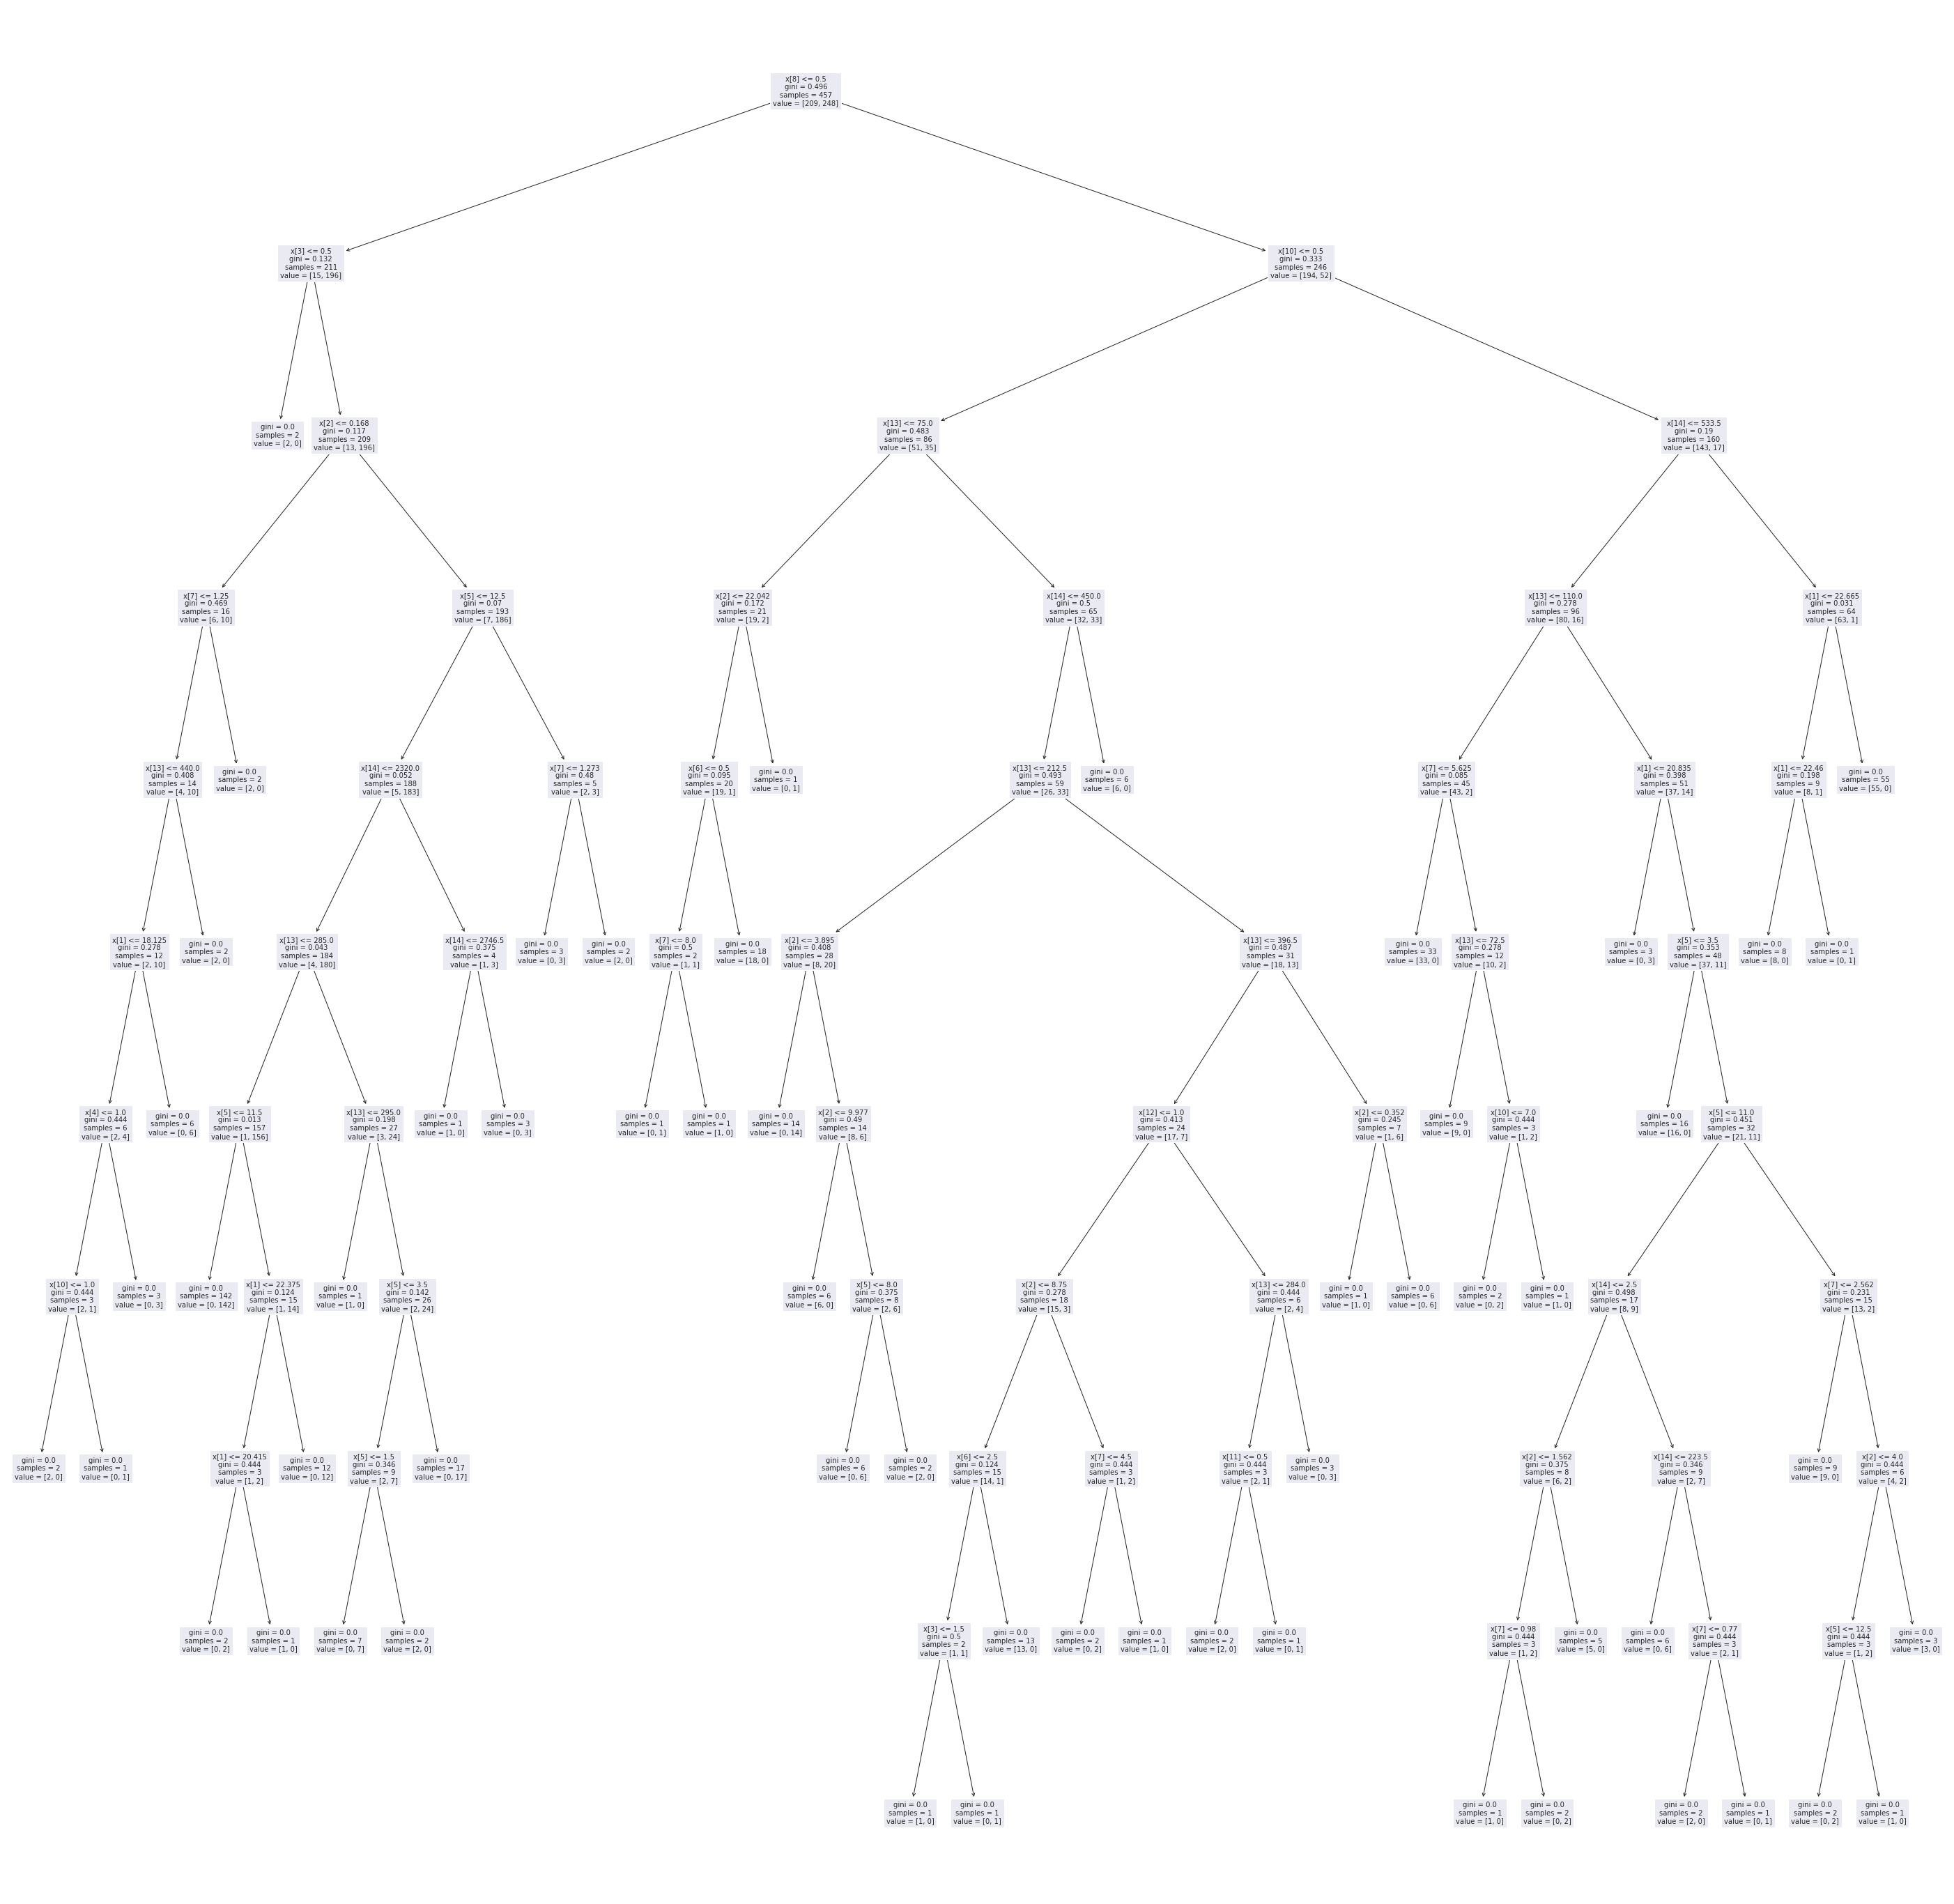

In [128]:
# tree visualization
plt.figure(figsize=(50,50))
tree.plot_tree(clf,fontsize=10)
plt.show()

In [129]:
# Test the model

preds = clf.predict(X_test)

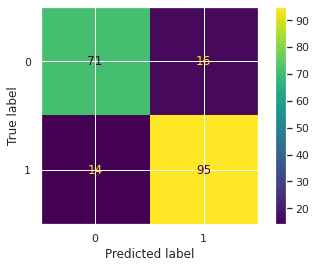

In [130]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix visualization
cm = confusion_matrix(y_test, preds, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)

disp.plot()

plt.show()

In [131]:
# Metrics
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, preds))
print("F1 Score",metrics.f1_score(y_test,preds,average=None))
print("Precision score: ", metrics.precision_score(y_test,preds,average=None))

Accuracy: 0.8469387755102041
F1 Score [0.8255814  0.86363636]
Precision score:  [0.83529412 0.85585586]


Put the explanation of your model here: I converted all the features to be numerical because decision trees algorithm can't work with categorical data. I trained using 70% of the data and tested with the other 30%. It resulted in a 84.7% accuracy.


# **Problem 2 - K-means (10 points)**
* Use the Ecoli dataset at https://archive.ics.uci.edu/ml/datasets/Ecoli
* Ignore the label and create clusters using k values between 1 and 6.
* Pick the best k value and explain why you picked it
* Show any calculations or visualizations you used to pick the best cluster
* Create two visualization
    * One colors the nodes with the cluster membership
    * The other colors the nodes based on the actual label
* Grading criteria: Adequately describe how to pick the best cluster and successful create the required visualizations
* Pick two features for your cluster visualization or use PCA

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [133]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data',
                   names = ['SequenceName', 'mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2', 'loc'],
                   delim_whitespace = True)

df.head()

,SequenceName,mcg,gvh,lip,chg,aac,alm1,alm2,loc
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [134]:
#Encode all data to be numerical
df['SequenceName'] = df['SequenceName'].astype('category')
df['SequenceName'] = df['SequenceName'].cat.codes

df['loc'] = df['loc'].astype('category')
df['loc'] = df['loc'].cat.codes
df

,SequenceName,mcg,gvh,lip,chg,aac,alm1,alm2,loc
0,1,0.49,0.29,0.48,0.5,0.56,0.24,0.35,0
1,2,0.07,0.40,0.48,0.5,0.54,0.35,0.44,0
2,3,0.56,0.40,0.48,0.5,0.49,0.37,0.46,0
3,4,0.59,0.49,0.48,0.5,0.52,0.45,0.36,0
4,5,0.23,0.32,0.48,0.5,0.55,0.25,0.35,0
...,...,...,...,...,...,...,...,...,...
331,318,0.74,0.56,0.48,0.5,0.47,0.68,0.30,7
332,323,0.71,0.57,0.48,0.5,0.48,0.35,0.32,7
333,326,0.61,0.60,0.48,0.5,0.44,0.39,0.38,7
334,333,0.59,0.61,0.48,0.5,0.42,0.42,0.37,7


In [135]:
df.dtypes

SequenceName      int16
mcg             float64
gvh             float64
lip             float64
chg             float64
aac             float64
alm1            float64
alm2            float64
loc                int8
dtype: object

Text(0.5, 1.0, 'Visualization of raw data')

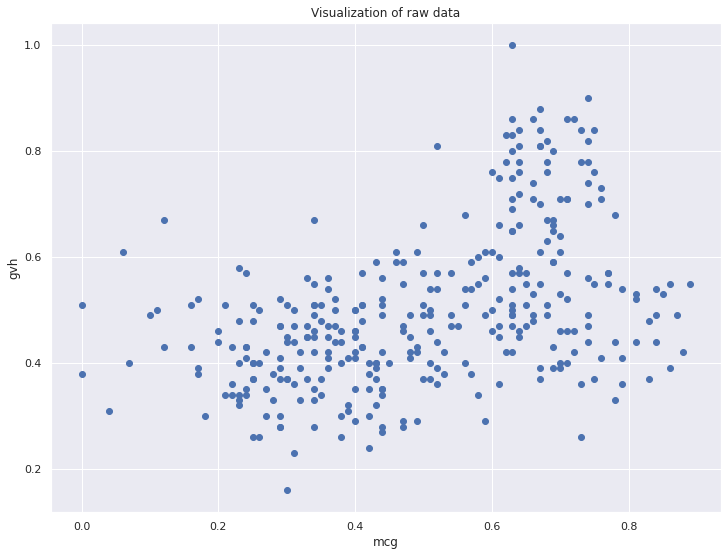

In [136]:
#visualize raw data
plt.figure(figsize = (12, 9))
plt.scatter(df['mcg'],df['gvh'])
plt.xlabel('mcg')
plt.ylabel('gvh')
plt.title('Visualization of raw data')

In [137]:
for k in range (1,7):
  kmeans = KMeans(n_clusters = k, n_init = 'auto')
  kmeans.fit(df[['mcg', 'gvh']])
  df[f'Kmeans_{k}'] = kmeans.labels_

In [138]:
df

,SequenceName,mcg,gvh,lip,chg,aac,alm1,alm2,loc,Kmeans_1,Kmeans_2,Kmeans_3,Kmeans_4,Kmeans_5,Kmeans_6
0,1,0.49,0.29,0.48,0.5,0.56,0.24,0.35,0,0,1,2,3,3,3
1,2,0.07,0.40,0.48,0.5,0.54,0.35,0.44,0,0,1,2,0,1,5
2,3,0.56,0.40,0.48,0.5,0.49,0.37,0.46,0,0,1,1,3,3,1
3,4,0.59,0.49,0.48,0.5,0.52,0.45,0.36,0,0,0,1,1,3,2
4,5,0.23,0.32,0.48,0.5,0.55,0.25,0.35,0,0,1,2,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,318,0.74,0.56,0.48,0.5,0.47,0.68,0.30,7,0,0,1,1,2,2
332,323,0.71,0.57,0.48,0.5,0.48,0.35,0.32,7,0,0,1,1,2,2
333,326,0.61,0.60,0.48,0.5,0.44,0.39,0.38,7,0,0,1,1,3,2
334,333,0.59,0.61,0.48,0.5,0.42,0.42,0.37,7,0,0,1,1,3,2


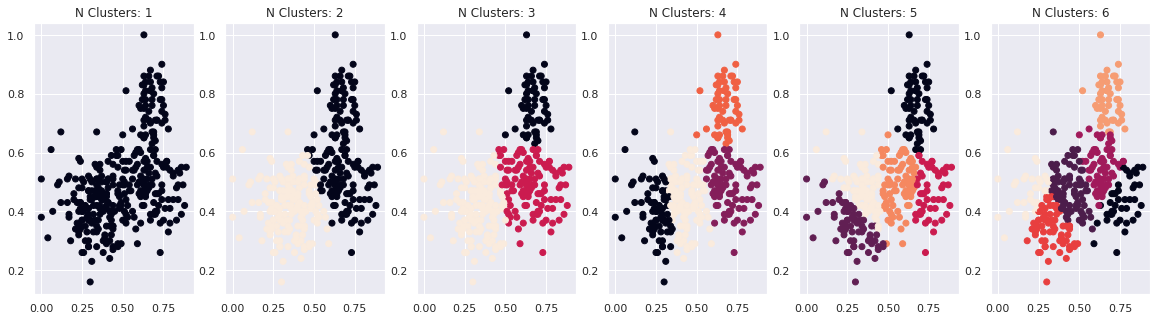

In [139]:
fig, axs = plt.subplots (nrows = 1, ncols = 6, figsize=(20,5))

for i, ax in enumerate (fig.axes, start = 1):
  ax.scatter(x = df['mcg'], y = df['gvh'], c = df[f'Kmeans_{i}'])
  ax.set_title(f'N Clusters: {i}')

In [140]:
# elbow methond to find the best K-Value
def elbow (x, kmax):
  sse = [None]
  for k in range (1, kmax+1):
    kmeans = KMeans (n_clusters = k, n_init = 'auto').fit(x)
    centriods = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(x)
    curr_sse = 0

    for i in range (len(x)):
      curr_center = centriods[pred_clusters[i]]
      curr_sse += (x.iloc[i][0] - curr_center[0]) ** 2 + (x.iloc[i][1] - curr_center[1]) **2

    sse.append(curr_sse)
  return sse

Text(0.5, 1.0, 'Sum of Squared error by number of clusters')

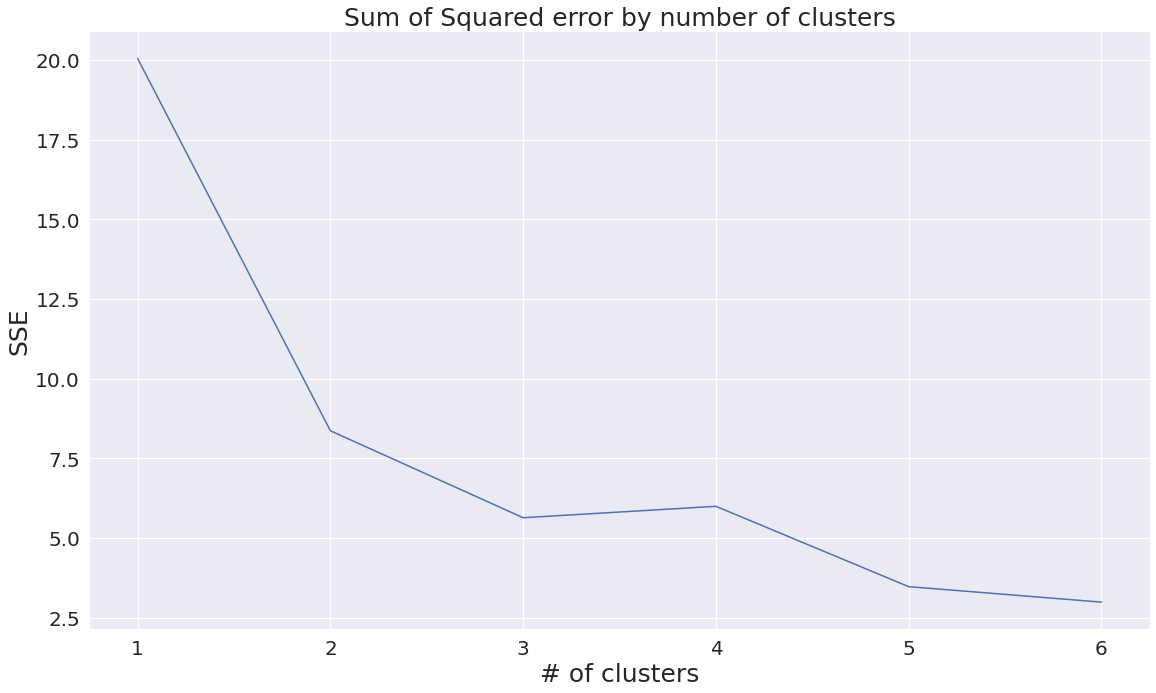

In [141]:
fig = plt.figure (figsize= (19,11))
ax = fig.add_subplot(1,1,1)
ax.plot(elbow(df[['mcg','gvh']],6))
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)

ax.set_xlabel('# of clusters', fontsize = 25)
ax.set_ylabel('SSE', fontsize = 25)
ax.set_title('Sum of Squared error by number of clusters', fontsize = 25)

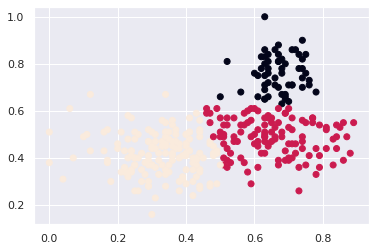

In [142]:
# Visulization based on nodes cluster membership with K-Mean = 3
plt.scatter (x = df['mcg'], y = df['gvh'], c = df['Kmeans_3'])
plt.show()

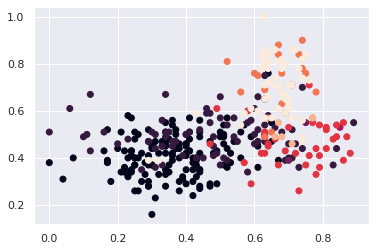

In [143]:
# Visulization based on nodes label
plt.scatter (x = df['mcg'], y = df['gvh'], c = df['loc'])
plt.show()

Provide an explanation of your model:
Based off of the elbow method, 2 and 3 are both viable K-Values but I chose 3 because I seems to be more fitting for this data set.

# **Problem 3 - Support Vector Machines (10 points)**
* Use the Iris trainging set
* Explore the data to find the best two features to use
    * We are mostly doing this so we can visualize the results
* Split the data set into 80% training and 20% testing
* Create a SVM to model the data
* Create a visualization that shows the decision line
    * Do not include the test data points
    * Randomly select 10 test points and add them to the visualization. Color them based on their label
    * Are the random test points consistently on the correct side of the line?
* Predict the label for ALL of the test data 
    * Show a confusion matrix
    * Calculate the F1 measure
* Grading criteria: 
    * SVM graphically appears to correctly to use a reasonable line
    * F1 measure is consistent with what we showed in class

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

iris =load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [145]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [146]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [147]:
df = pd.DataFrame (iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [148]:
df.shape

(150, 4)

In [149]:
#include target column
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [150]:
df[df.target == 1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [151]:
df[df.target == 2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [152]:
#assign data with different target values to their own variables
df0 = df[df.target ==0]
df1 = df[df.target ==1]
df2 = df[df.target ==2]

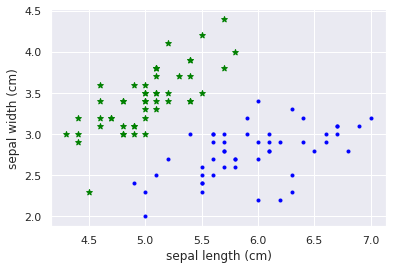

In [153]:
#plot data based on sepal length and width
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter (df0['sepal length (cm)'], df0['sepal width (cm)'], color = 'green', marker ='*')
plt.scatter (df1['sepal length (cm)'], df1['sepal width (cm)'], color = 'blue', marker ='.')

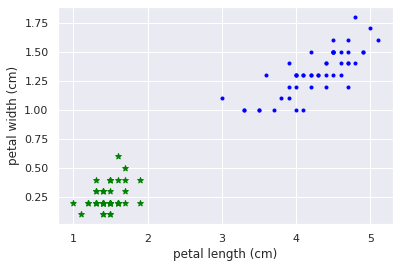

In [154]:
#plot data based on petal length and width
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter (df0['petal length (cm)'], df0['petal width (cm)'], color = 'green', marker ='*')
plt.scatter (df1['petal length (cm)'], df1['petal width (cm)'], color = 'blue', marker ='.')

In [155]:
from sklearn.model_selection import train_test_split

#drop sepal because petal is a better feature
X = df.drop (['target', 'sepal length (cm)','sepal width (cm)' ], axis = 'columns')
X.head()


,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [156]:
#assign independent var
y = df.target

In [157]:
#train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


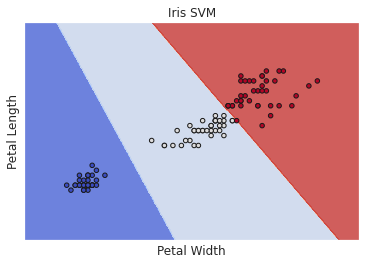

In [158]:
# visualization
from sklearn import svm
from sklearn.svm import SVC
feature_names = ["Petal Length","Petal Width"]
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy
def plot_contours(ax, clf, xx, yy, **params):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
# The classification SVC model
model = svm.SVC(kernel="linear")
clf = model.fit(X_train, y_train)
fig, ax = plt.subplots()
# title for the plots
title = ('Iris SVM')
# Set-up grid for plotting.
X0, X1 = X_train.iloc[:, 0], X_train.iloc[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_ylabel("{}".format(feature_names[0]))
ax.set_xlabel("{}".format(feature_names[1]))
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [159]:
# model predictions
model_predict = model.predict(X_test)
print(model_predict)

[2 0 0 1 1 0 1 0 2 2 2 1 2 2 2 1 2 2 0 0 2 1 1 2 0 2 1 1 1 0]


In [160]:
# Confusion Matrix Visualization
from sklearn.metrics._plot.confusion_matrix import unique_labels
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def plot(y,y_test):
  labels = unique_labels(y_test)
  column = [f'Predicted{label}' for label in labels]
  indices = [f'Actual{label}' for label in labels]
  table = pd.DataFrame(confusion_matrix(y,y_test),
                       columns = column,
                       index = indices)
  
  return sns.heatmap(table, annot = True, fmt ='d', cmap = 'viridis')

<Axes: >

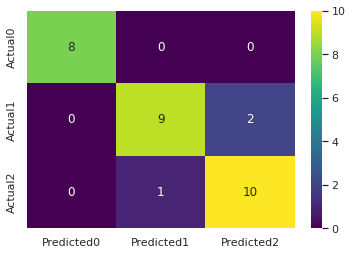

In [161]:
plot(y_test,model_predict)

In [162]:
from sklearn.metrics import f1_score
f1_score(y_test, model_predict,average='micro')

0.9

Explanation of your model: I decided to drop the sepal length and width from the data set because the petal length and width seem to be the better feature based on visualization. After I trained the model it seems to be performing quite well, although it incorrectly predicted 2 target nodes. This model has an F1 score of 0.933. 
